# Q1a

Two graphs are created for this problem, the first one shows the sequence in amp_data, the second one is the histogram of the amplitudes in this sequence. One thing that should be noticed is that most of the amplitudes are gathered near the centre which value is 0. The distribution of the amplitudes looks like a Gaussian distribution.

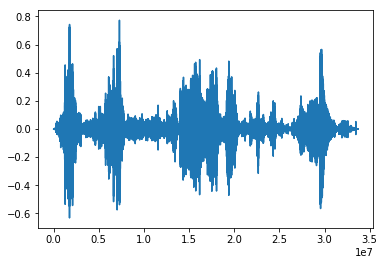

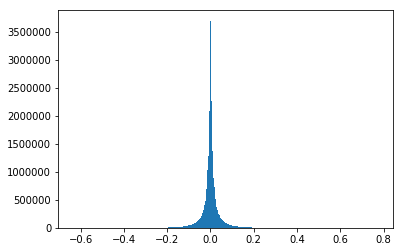

In [1]:
%matplotlib inline
import numpy as np
import scipy.io
import matplotlib.pyplot as plt

#load dataset
mat_contents = scipy.io.loadmat("/afs/inf.ed.ac.uk/group/teaching/mlprdata/audio/amp_data.mat")
amp_data = mat_contents['amp_data']
#histogram
plt.plot(amp_data)
plt.show()
plt.hist(amp_data, bins=500)
plt.show()
#reshape dataset
row_num = amp_data.shape[0]
remainder = row_num % 21;
amp_data = amp_data[0:(row_num-remainder)];
amp_data = amp_data.reshape((-1,21))

# Q1b

In [2]:
#shuffle rows of the matrix
np.random.seed(0)
rand_perm = np.random.permutation(amp_data.shape[0])
shuf_data = amp_data[rand_perm,:]
row_num = shuf_data.shape[0]
train = shuf_data[:round(row_num*0.7),:]
val = shuf_data[round(row_num*0.7):round(row_num*0.85),:]
test = shuf_data[round(row_num*0.85):,:]

X_shuf_train = train[:,:20]
y_shuf_train = train[:,20][:,None]
X_shuf_val = val[:,:20]
y_shuf_val = val[:,20][:,None]
X_shuf_test = test[:,:20]
y_shuf_test = test[:,20][:,None]

# Q2a

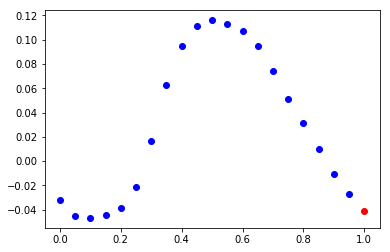

In [3]:
#plot dataset
X = X_shuf_train[0,:]
tt = np.arange(0,1,0.05)[:,None]
# print(x.shape)
# print(t.shape)
# print(amp_data.shape)
# print(amp_data)
plt.plot(tt,X,'bo')
plt.plot(1,y_shuf_train[0],'ro')
plt.show()

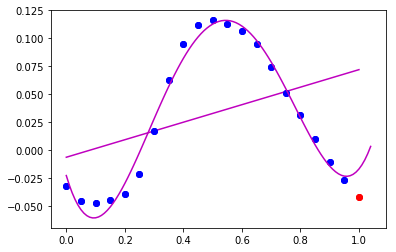

In [4]:
#linear fit by least squares
def phi_linear(X):
    """
    construct design matrix given input feature i.e. time X
    """
    return np.concatenate([np.ones((X.shape[0],1)), X], axis=1)
ww = np.linalg.lstsq(phi_linear(tt), X, rcond=-1)[0]
t_grid = np.arange(0, 1.05, 0.05)[:,None]
f_grid = np.dot(phi_linear(t_grid), ww)
plt.plot(tt,X,'bo')
plt.plot(1,y_shuf_train[0],'ro')
plt.plot(t_grid, f_grid, 'm-')

#quartic fit
def phi_quartic(X):
    return np.concatenate([np.ones((X.shape[0],1)),\
                           X, X**2, X**3, X**4], axis=1)
ww = np.linalg.lstsq(phi_quartic(tt), X, rcond=-1)[0]
t_grid = np.arange(0, 1.05, 0.01)[:,None]
f_grid = np.dot(phi_quartic(t_grid), ww)
plt.plot(tt,X,'bo')
plt.plot(1,y_shuf_train[0],'ro')
plt.plot(t_grid, f_grid, 'm-')
plt.show()

# Q2b

As shown above, the amplitude of the test point is about -0.05. However, the prediction made by the linear regression is about 0.70. If we only use recent two points, the fit line cross the test point.

The line created by the linear regression fit all 20 points and shows the trend of the whole training set. It may not show the trend of recent training samples. Therefore, it may be better to use recent two points to fit a line.

For quartic fit, it can create an useful fit only if there are many samples in the training set. Because in this way a learner that have ability to predict the test point accurately can be created. The graph can cross almost all training points and the test points. It performs better than the linear fit which cannot show the distribution of the amplitudes.

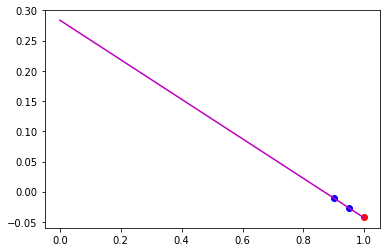

In [5]:
X = X_shuf_train[0,18:]
tt = np.arange(0.9,1,0.05)[:,None]
ww = np.linalg.lstsq(phi_linear(tt), X, rcond=-1)[0]
t_grid = np.arange(0, 1.05, 0.05)[:,None]
f_grid = np.dot(phi_linear(t_grid), ww)
plt.plot(tt,X,'bo')
plt.plot(1,y_shuf_train[0],'ro')
plt.plot(t_grid, f_grid, 'm-')
plt.show()

# Q2c

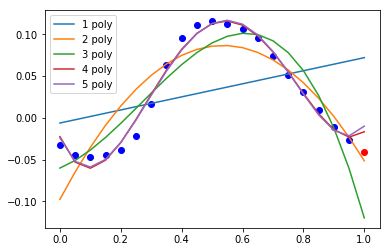

In [6]:
def phi_1(X):
    return np.concatenate([np.ones((X.shape[0],1)), X], axis=1)
def phi_2(X):
    return np.concatenate([np.ones((X.shape[0],1)),X, X**2], axis=1)
def phi_3(X):
    return np.concatenate([np.ones((X.shape[0],1)),X, X**2, X**3], axis=1)
def phi_4(X):
    return np.concatenate([np.ones((X.shape[0],1)),X, X**2, X**3, X**4], axis=1)
def phi_5(X):
    return np.concatenate([np.ones((X.shape[0],1)),X, X**2, X**3, X**4, X**5], axis=1)
polyfuns = [phi_1, phi_2, phi_3, phi_4, phi_5]

X = X_shuf_train[0,:]
tt = np.arange(0,1,0.05)[:,None]
plt.plot(tt,X,'bo')
plt.plot(1,y_shuf_train[0],'ro')

t_grid = np.arange(0, 1.05, 0.05)[:,None]
for funIdx in range(len(polyfuns)):
    ww = np.linalg.lstsq(polyfuns[funIdx](tt), X, rcond=-1)[0]
    # print(funIdx+1, "order poly, weights are", ww)
    f_grid = np.dot(polyfuns[funIdx](t_grid), ww)
    plt.plot(t_grid, f_grid, label=str(funIdx+1)+" poly")
plt.legend(loc='upper left')
plt.show()

For this question, we create more fit graphs. Their order vary from 1 to 5. From the graphs, what can be seen is the trend of the quadratic fit and cubit fit is downward after the final training point while the quartic fit and quintic fit is upward. Therefore, a fit with highest order 2 or 3 may be best. Regarding the context length. It cannot be too short to build a useful learner. 20 is a good context length here.

# Q3a

Substitue $\boldsymbol{w}$ with $(\Phi^T \Phi)^{-1} (\Phi^T \boldsymbol{x})$, 
\begin{equation}
\begin{aligned}
    f(t=1) &= \boldsymbol{w^T} \boldsymbol{\phi}(t=1) \\
    &= \lbrack (\Phi^T \Phi)^{-1} (\Phi^T \boldsymbol{x}) \rbrack ^T \boldsymbol{\phi}(t=1) \\
    &= (\Phi^T \boldsymbol{x})^T (\Phi^T \Phi)^{-T} \boldsymbol{\phi}(t=1) \\
    &= \boldsymbol{x}^T \Phi (\Phi^T \Phi)^{-1} \boldsymbol{\phi}(t=1)
\end{aligned}
\end{equation}

The transpose of a scalar is itself. $f(t=1)$ is a scalar. Thefore, 
\begin{equation}
\begin{aligned}
    f(t=1) &= f(t=1)^T \\
    &= (\boldsymbol{v}^T \boldsymbol{x})^T \\
    &= \boldsymbol{x}^T \boldsymbol{v}
\end{aligned}
\end{equation}

\begin{equation}
    \boldsymbol{v} = \Phi (\Phi^{T} \Phi)^{-1} \boldsymbol{\phi}(t=1)
\end{equation}

# Q3bi

In [7]:
def Phi(C, K):
    """
    Construct a C×K design matrix
    """
    X = np.linspace(1-C*0.05,1,num=C,endpoint=False)[:,None]
    phi = np.ones((X.shape[0],1))
    for k in range(K-1):
        phi = np.concatenate([phi, X**(k+1)], axis=1)
    return phi

# Q3bii

In [8]:
def phi_vector(t, K):
    """
    phi vector given t
    """
    phi_v = np.empty(K)[:,None]
    for idx in range(K):
        phi_v[idx] = t**idx
    return phi_v

def is_invertible(a):
    return a.shape[0] == a.shape[1] and \
        np.linalg.matrix_rank(a) == a.shape[0]

def make_vv(C, K):
    """
    return vector v
    return None if vector phi.T times phi gives a singular matrix
    """
    phi = Phi(C,K)
    mat = np.dot(phi.T,phi)
    if is_invertible(mat):
        temp = np.linalg.inv(mat)
        temp = np.dot(phi,temp)
        return np.dot(temp,phi_vector(1,K)) 
    else: return None

# Q3biii

In Question 2, we fit a linear model to 20 datapoints. In this context, $K=2$ and $\boldsymbol{\phi}=[1 \ \ t]^T$ has 2 features. Fitting such a linear model to 20 previous amplitudes is equivalent to a linear combination of 20 amplitudes weighted by vector $\boldsymbol{v}$ with 2 features. We could construct a vector $\boldsymbol{v}$ by calling $make\_vv(C,K)$ with $C=20$ and $K=2$. We then weight 20 datapoints with $\boldsymbol{v}$ to predict (t=1). In the same way, quartic fit to 20 datapoints is equivalent to a linear combination of 20 datapoints weighted by vector v with 5 features. 

The following snippet demonstrates $make\_vv(C,K)$ for appropriate C and K can make the same predictions at time t=1 as linear fit and quartic fit in Q2. 

In [9]:
vv_linear = make_vv(20,2)
vv_quartic = make_vv(20,5)
print("Target value when t=1 is %f" % y_shuf_train[0])
print("Linear combination when K=2 is %f" % np.dot(vv_linear.T,X))
print("Linear combination when K=5 is %f" % np.dot(vv_quartic.T,X))

ww = np.linalg.lstsq(phi_linear(tt), X, rcond=-1)[0]
f = np.dot(ww,phi_vector(1,2))
print("Linear fit predicts y(t=1) is %f" % f)

ww = np.linalg.lstsq(phi_quartic(tt), X, rcond=-1)[0]
f = np.dot(ww,phi_vector(1,5))
print("Quartic fit predicts y(t=1) is %f" % f)

Target value when t=1 is -0.041473
Linear combination when K=2 is 0.071927
Linear combination when K=5 is -0.016823
Linear fit predicts y(t=1) is 0.071927
Quartic fit predicts y(t=1) is -0.016823


# Q3ci

The snippet below loops over $C\in[1,20]$ and $K\in[1,6]$ and calculates square error on the shuffled training set. It prints the setting of $C$ and $K$ that gives the minimum square error, which is $C=2, K=2$. 

In [10]:
def square_error(C,K):
    """
    return square error on training set,
    return None if vector v is None
    i.e. phi.T times phi gives a singular matrix
    """
    vv = make_vv(C,K)
    if vv is not None:
        ff = np.dot(X_shuf_train[:,-C:],vv)
        residual = (y_shuf_train - ff)
        return np.dot(residual.T,residual)
    else: return None

c_min = 0
k_min = 0
min_error = 999999
for c in range(1,21):
    for k in range(1,6):
        #print("(C,K) = (",c,k,")",square_error(c,k))
        cur_error = square_error(c,k)
        if cur_error != None and cur_error < min_error:
            min_error,c_min,k_min = cur_error,c,k

print("When (C,K)=(%d,%d), min square error = %f" \
      % (c_min, k_min, min_error))

When (C,K)=(2,2), min square error = 15.236313


# Q3cii
|&nbsp;                 | Train | Validation | Test       |
|-----------------------|-------|------------|------------|
| rms ($\times10^{-5}$) | 1.356 | 1.340      | 1.352      |

In [11]:
def mse(C,K,X,yy):
    """
    return mean square error on some dataset
    """
    vv = make_vv(C,K)
    ff = np.dot(X,vv)
    residual = (yy - ff)
    return np.dot(residual.T,residual)/yy.shape[0]

C,K = 2,2
print("Train: min mse = %f" % mse(C,K,X_shuf_train[:,-C:],y_shuf_train))
print("Val:   min mse = %f" % mse(C,K,X_shuf_val[:,-C:],y_shuf_val))
print("Test:  min mse = %f" % mse(C,K,X_shuf_test[:,-C:],y_shuf_test))

Train: min mse = 0.000014
Val:   min mse = 0.000013
Test:  min mse = 0.000014


# Q4a

Context length $C=20$ gives the lowest mean square error on the training set. Given 20 datapoints, $\boldsymbol{v}$ is a $20\times1$ vector. A linear combination of 20 points gives the more freedom to the model. Therefore, this model can be fitted closely to datapoints. A high-degre polynomial model is likey to have a lower square error, but usually have extreme weights. For example, $w_3=-0.008215$ is nearly one three-hundredth of $w_{19}=-2.506848$. 

Context length C=16 gives the lowest mean square error on the valisation set.

In [12]:
def mse(X,yy,vv):
    ff = np.dot(X,vv)
    residual = yy - ff
    return np.dot(residual.T,residual)/yy.shape[0]

min_mse, best_C, best_vv = 99999, None, None
for C in range(1,21):
    vv = np.linalg.lstsq(X_shuf_train[:,-C:], y_shuf_train, rcond=-1)[0]
    cur_mse = mse(X_shuf_train[:,-C:],y_shuf_train,vv)
    if cur_mse < min_mse: 
        min_mse, best_C, best_vv = cur_mse, C, vv

print("mse = %f" % min_mse)
print("best_C =", best_C)

mse = 0.000008
best_C = 20


In [13]:
min_mse, best_C, best_vv = 99999, None, None
for C in range(1,21):
    vv = np.linalg.lstsq(X_shuf_train[:,-C:], y_shuf_train, rcond=-1)[0]
    cur_mse = mse(X_shuf_val[:,-C:],y_shuf_val,vv)
    if cur_mse < min_mse: 
        min_mse, best_C, best_vv = cur_mse, C, vv

print("mse = %f" % min_mse)
print("best_C =", best_C)

mse = 0.000008
best_C = 16


# Q4b

In [14]:
#best mode from Q3, C,K=2,2
vv_q3 = make_vv(2,2)
vv_q4 = best_vv
test_error_q4 = mse(X_shuf_test[:,-16:],y_shuf_test,vv_q4)
print("Q4 test error = %f" % test_error_q4)

Q4 test error = 0.000008


Q4 predictor gives smaller mse (0.000008) on validation set than Q3 model (0.000014). In terms of error, Q4 model is better. The polynomial model from Q3 might be preferable, as there is no need to use a complex model if a simple model is good enough to fit dataset. Q4 model is a 15th order polynomial function, while Q3 model is a linear model. Q3 model needs less computation and therefore faster. 

# Q4c

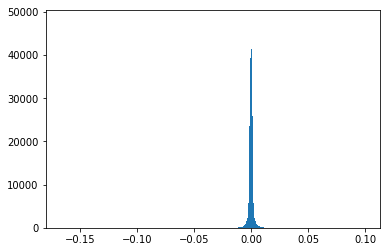

In [15]:
yy = y_shuf_val[:,-16:]
ff = np.dot(X_shuf_val[:,-16:],vv_q4)
residual = yy - ff
plt.hist(residual,bins=500)
plt.show()

Both histograms have an approximately symmetric mound shape and a extremely narrow dispersion. The histogram in Q1 has a slightly wider spread. In each graph, most datapoints share the same value. In Q1 histogram, over 3.5 million points hold amplitude of nearly zero. In Q4 histogram, residuals are mostly zero, which means the model makes good prediction on most datapoints.   

# Q5

In this assignment, we only used polynomial models for curve fitting. We could also use other basis functions (e.g. RBF) to fit through data. 

High-degree polynomial model and many RBF functions can cause overfitting problem like Q4a model. We could use regularization by penalizing the sum of square weights in cost function. 

